# **Predict the number in the images**


**importing the libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docutils.nodes import figure
from holoviews.plotting.bokeh.styles import font_size
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_digits

%matplotlib inline
digits = load_digits()

In [9]:
print('Image Data Shape: ', digits.data.shape)
print('Label Data Shape: ', digits.target.shape)

Image Data Shape:  (1797, 64)
Label Data Shape:  (1797,)


# Sample of the Data

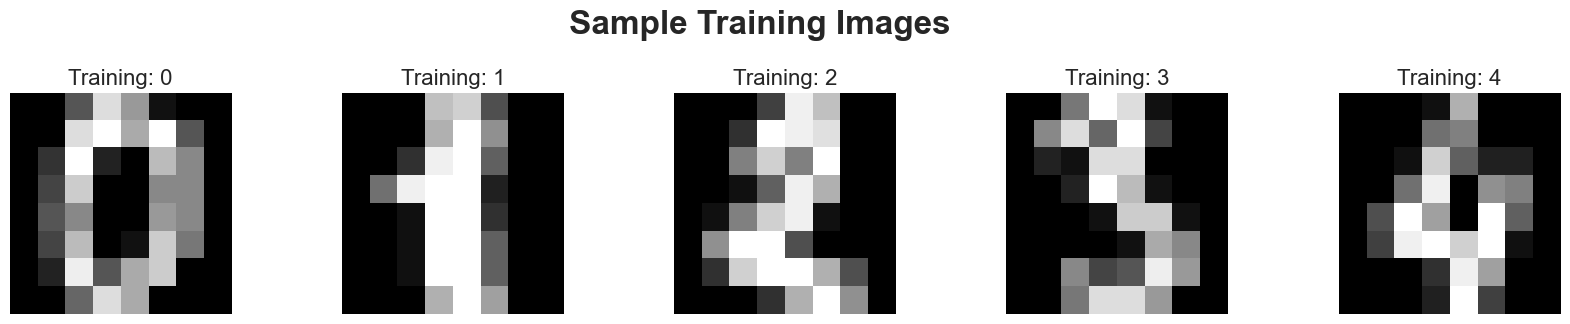

In [36]:
plt.figure(figsize=(20, 4))

for i, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Training: {label}', fontsize=16)
    plt.axis('off')  

plt.subplots_adjust(wspace=0.5)  
plt.suptitle('Sample Training Images', fontsize=24, fontweight='bold')
plt.show()

    

# split data into Training and Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=4  )

# Deploy the model

In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression(solver='lbfgs', max_iter=500)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [17]:
logreg.predict(x_test)

array([8, 7, 0, 5, 3, 5, 1, 3, 1, 8, 2, 7, 8, 4, 7, 7, 8, 3, 0, 6, 9, 7,
       1, 0, 8, 6, 8, 1, 0, 0, 0, 2, 7, 1, 1, 7, 6, 3, 2, 3, 4, 2, 9, 5,
       2, 0, 0, 7, 3, 3, 2, 9, 7, 6, 1, 8, 5, 8, 6, 7, 5, 6, 9, 3, 1, 4,
       1, 9, 7, 8, 4, 1, 2, 4, 1, 6, 6, 7, 8, 1, 2, 6, 9, 1, 7, 4, 2, 6,
       7, 3, 7, 5, 4, 8, 5, 1, 5, 6, 7, 1, 2, 5, 5, 2, 0, 8, 5, 1, 2, 3,
       0, 4, 5, 6, 9, 3, 9, 5, 7, 4, 7, 8, 9, 4, 9, 7, 9, 7, 9, 4, 3, 0,
       5, 4, 9, 2, 9, 2, 9, 6, 2, 6, 0, 5, 5, 8, 9, 2, 4, 3, 4, 4, 2, 0,
       9, 8, 4, 3, 6, 6, 2, 9, 7, 1, 5, 7, 6, 0, 5, 3, 2, 3, 1, 3, 2, 6,
       6, 0, 8, 2, 5, 7, 6, 8, 4, 6, 2, 2, 0, 4, 0, 3, 0, 4, 0, 1, 5, 6,
       4, 7, 1, 5, 4, 5, 5, 3, 4, 4, 6, 3, 7, 1, 1, 3, 1, 7, 5, 0, 1, 9,
       5, 0, 8, 7, 4, 0, 6, 6, 5, 0, 2, 4, 2, 9, 4, 0, 6, 2, 9, 1, 9, 6,
       3, 9, 0, 8, 3, 1, 2, 1, 3, 2, 0, 9, 0, 7, 5, 9, 1, 8, 6, 9, 6, 8,
       8, 6, 2, 4, 5, 9, 9, 1, 5, 2, 8, 4, 7, 9, 8, 8, 0, 1, 7, 3, 2, 2,
       1, 0, 3, 2, 3, 9, 7, 2, 0, 0, 1, 2, 6, 0, 9,

In [20]:
predictions = logreg.predict(x_test)
score = logreg.score(x_test, y_test)
print('Score is: %',score * 100)

Score is: % 96.94444444444444


# Plotting the figure

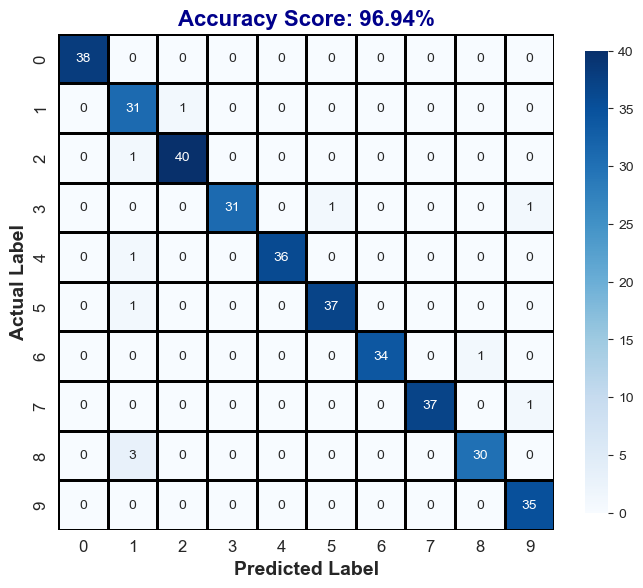

In [37]:
conf_matrix = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black',cbar_kws={'shrink': 0.75})  # Reduce color bar size

plt.ylabel('Actual Label', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')

accuracy_score = score * 100
plt.title(f'Accuracy Score: {accuracy_score:.2f}%', size=16, fontweight='bold', color='darkblue')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


# Sample of how model works

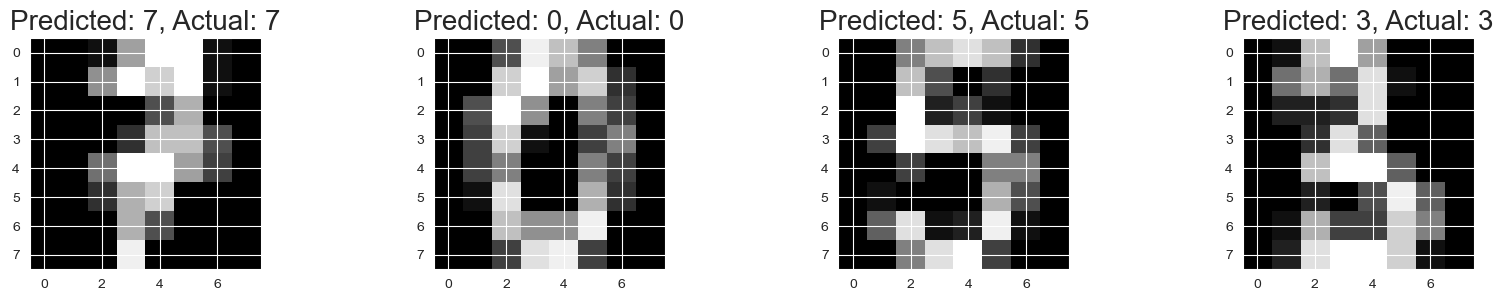

In [38]:
classified_index = [index for index, (predict, actual) in enumerate(zip(predictions, y_test)) if predict == actual]

plt.figure(figsize=(20, 3))
for plot_index, correct in enumerate(classified_index[:4]):
    plt.subplot(1, 4, plot_index + 1)
    plt.imshow(np.reshape(x_test[correct], (8, 8)), cmap='gray')
    plt.title(f'Predicted: {predictions[correct]}, Actual: {y_test[correct]}', fontsize=20)
